In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

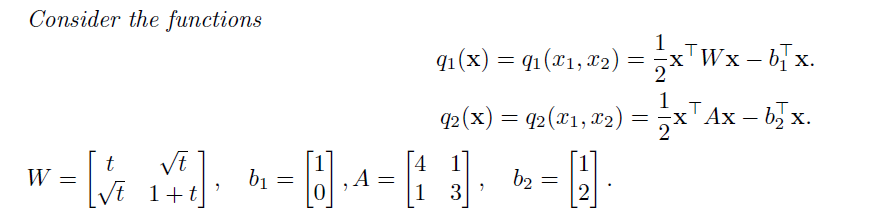

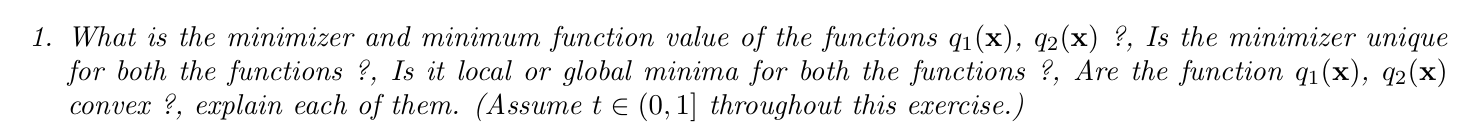

Note that if $t \in (0,1]$ then the matrix $W$ is PD. Why? Because, the leading pricipal minors which are $t, t^2$ are positive. Also the matrix A has eigenvalues 2, 8 hence A is also PD.
Coming back to question, minimizer for $q_1(x)$, $\nabla{q_1(x)} = Wx - b_1 = 0$

$⇒x^* = W^{-1}b_1$, also W is invertible because it is PD. $\nabla^2{q_1(x)} = W$ is PD, hence the critical point is minimizer. It is also the global minimizer because the function is strictly convex.

for $q_2(x)$, $\nabla{q_2(x)} = Ax - b_2 = 0 ⇒x^* =A^{-1}b_2$ is the global optima, as again $\nabla^2{q_2(x)} = A$ which is PD. Hence $q_2(x)$ is convex.


In [2]:
#actual optimum calculation for q1
t = 0.001
W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
b = np.array([1,0])
print(np.linalg.inv(W)@b)

[1000999.99999988  -31622.77660168]


In [3]:
#actual optimal calculation for q2
A = np.array([[4,1],[1,3]])
b2 = np.array([1,2])
print(np.linalg.inv(A)@b2)

[0.09090909 0.63636364]


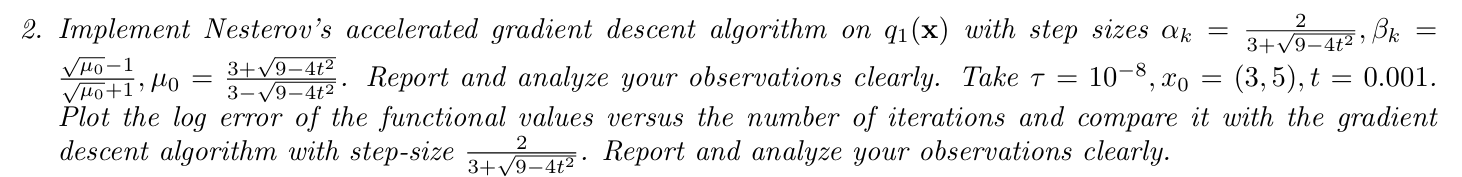

In [10]:
#nesterov
def q1(x,W,b1):
  return 0.5*x@W@x - b1@x

def grad_q1(x, W, b1):
  return W@x - b1

def nagd(x0, alpha, beta, tolerance, t):
  prevx = np.copy(x0)
  x = np.copy(x0)
  count = 0
  W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
  b1 = np.array([1.,0.])
  xks = []
  xks.append(x)
  while norm(grad_q1(x, W, b1)) > tolerance:
    grad_pert = grad_q1(x + beta*(x-prevx), W, b1)
    xnext = x - alpha*grad_pert + beta*(x-prevx)
    prevx= np.copy(x)
    x = np.copy(xnext)
    xks.append(x)
    count +=1
  return count, x, q1(x,W,b1), xks

def gradient_descent(alpha,tolerance):
  x = np.copy(x0)
  count = 0
  W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
  b1 = np.array([1.,0.])
  xks = []
  xks.append(x)
  while norm(grad_q1(x, W, b1)) > tolerance:
    x = x - alpha*grad_q1(x,W,b1)
    count +=1
    if count%4 == 1:
      xks.append(x)
    # print(x)
  return count, x, q1(x,W,b1), xks


In [11]:
x0 = np.array([3.,5.])
tau = 1e-8
t = 0.001
alpha  = 2/(3+ np.sqrt(9-4*t**2))
u0 = (3+np.sqrt(9-4*t**2))/(3-np.sqrt(9-4*t**2))
beta = (np.sqrt(u0)-1)/(np.sqrt(u0)+1)
count, minimizer, minimum, xknagd= nagd(x0, alpha, beta, tau, t)
print("minimizer |    minimum | iterations  | type")
print('------------------------------------------------------')
print(f'{minimizer}   | {minimum}   | {count}  | NAGD')
print("------------------------------------------------------")
count, minimizer, minimum, xkgd = gradient_descent(alpha,tau)
print(f'{minimizer}   | {minimum}   | {count}  | Gradient Descent Normal')
print("------------------------------------------------------")

minimizer |    minimum | iterations  | type
------------------------------------------------------
[1000999.99137202  -31622.77632912]   | -500499.99999995145   | 31343  | NAGD
------------------------------------------------------
[1000999.98998494  -31622.7762853 ]   | -500499.9999999165   | 55371021  | Gradient Descent Normal
------------------------------------------------------


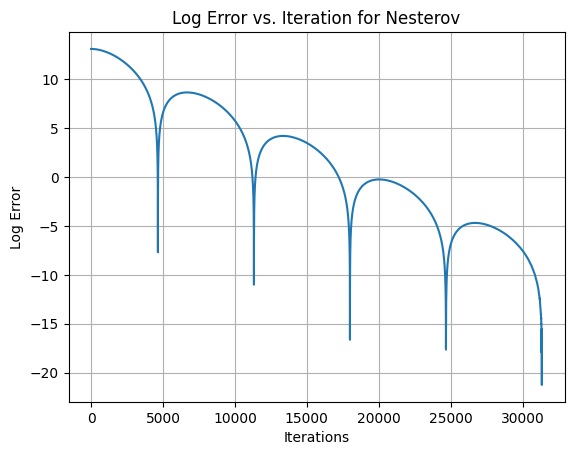

<ipython-input-20-15403254d91b>:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(log_error_gd))


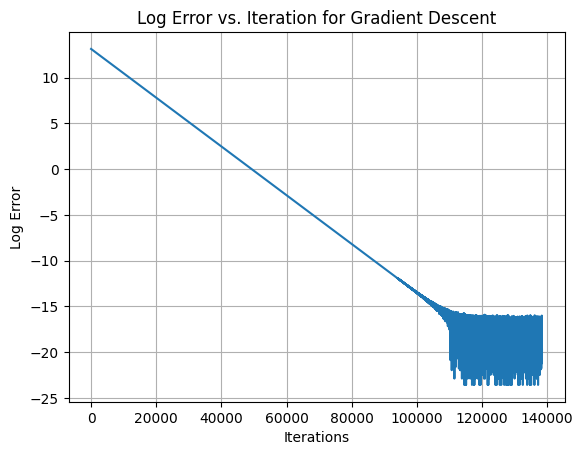

In [20]:
#log error for both
t = 0.001
W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
b1 = np.array([1,0])
optimal =q1(np.array([1000999.99999988, -31622.77660168]),W,b1)
log_error_nagd = [np.abs(q1(x,W,b1) - optimal) for x in xknagd]

n = len(xkgd)
log_error_gd = []
for i in range(n):
  if i%100 ==0:
    x = xkgd[i]
    log_error_gd.append(np.abs(q1(x, W, b1) -optimal))


plt.plot(np.log(log_error_nagd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Nesterov")
plt.grid(True)
plt.show()

plt.plot(np.log(log_error_gd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Gradient Descent")
plt.grid(True)
plt.show()

OBSERVATIONS: as we observe the Nesterov ran really fast compared to plain gradient descent, this is because the step size is too small and will take to converge, but the momentum term in nesterov accelerated the movement to converge faster.

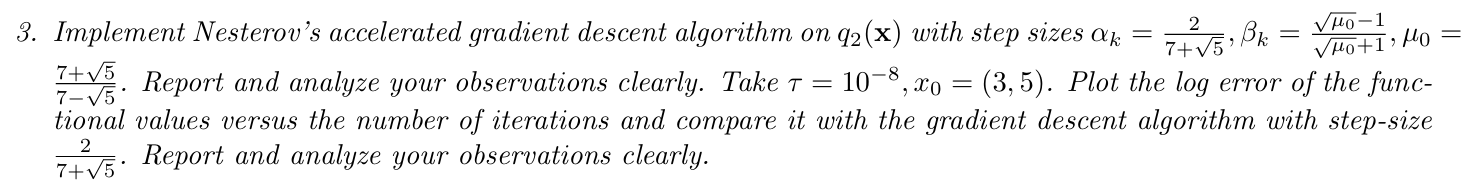

In [25]:
#nesterov
def q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return 0.5*x@A@x - b2@x

def grad_q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return A@x - b2

def nagd(x0, alpha, beta, tolerance, t):
  prevx = np.copy(x0)
  x = np.copy(x0)
  count = 0
  xks = []
  xks.append(x)
  while norm(grad_q2(x)) > tolerance:
    grad_pert = grad_q2(x + beta*(x-prevx))
    xnext = x - alpha*grad_pert + beta*(x-prevx)
    prevx= np.copy(x)
    x = np.copy(xnext)
    xks.append(x)
    count +=1
  return count, x, q2(x), xks

def gradient_descent(alpha,tolerance):
  x = np.copy(x0)
  count = 0
  xks = []
  xks.append(x)
  while norm(grad_q2(x)) > tolerance:
    x = x - alpha*grad_q2(x)
    count +=1
    xks.append(x)
    # print(x)
  return count, x, q2(x), xks

In [26]:
x0 = np.array([3.,5.])
tau = 1e-8
t = 0.001
alpha  = 2/(7+np.sqrt(5))
u0 = (7+np.sqrt(5))/(7-np.sqrt(5))
beta = (np.sqrt(u0)-1)/(np.sqrt(u0)+1)
count, minimizer, minimum, xksnagd = nagd(x0, alpha, beta, tau, t)
print("minimizer |    minimum | iterations  | type")
print('------------------------------------------------------')
print(f'{minimizer}   | {minimum}   | {count}  | NAGD')
print("------------------------------------------------------")
count, minimizer, minimum, xksgd = gradient_descent(alpha,tau)
print(f'{minimizer}   | {minimum}   | {count}  | Gradient Descent Normal')
print("------------------------------------------------------")

minimizer |    minimum | iterations  | type
------------------------------------------------------
[0.09090909 0.63636364]   | -0.681818181818182   | 18  | NAGD
------------------------------------------------------
[0.09090909 0.63636364]   | -0.6818181818181819   | 28  | Gradient Descent Normal
------------------------------------------------------


OBSERVATIONS: here NAGD and GD perform similarly, though NAGD is faster again than normal gradient descent.  Both achieve the optimal values.

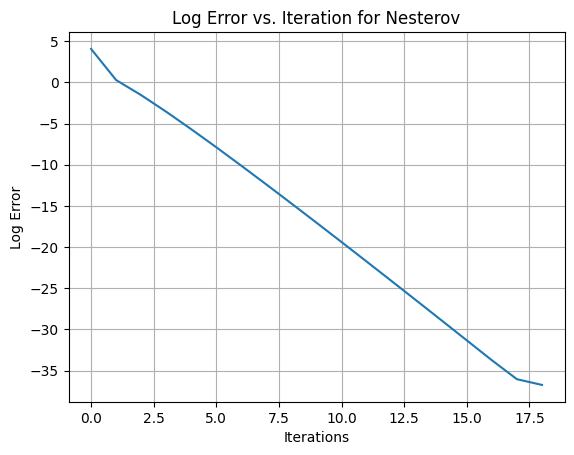

<ipython-input-30-277632354603>:17: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(log_error_gd))


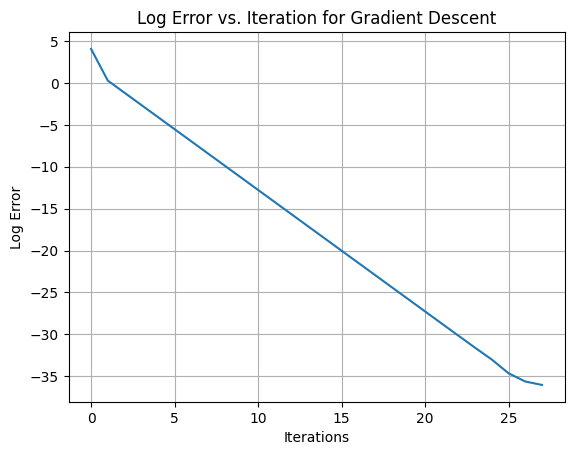

In [30]:
#log error for both
t = 0.001
W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
b1 = np.array([1,0])
A = np.array([[4,1],[1,3]])
b2 = np.array([1,2])
log_error_nagd = [np.abs(q2(x) - q2(np.array([0.09090909, 0.63636364]))) for x in xksnagd]
log_error_gd = [np.abs(q2(x) - q2(np.array([0.09090909, 0.63636364]))) for x in xksgd]

plt.plot(np.log(log_error_nagd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Nesterov")
plt.grid(True)
plt.show()

plt.plot(np.log(log_error_gd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Gradient Descent")
plt.grid(True)
plt.show()

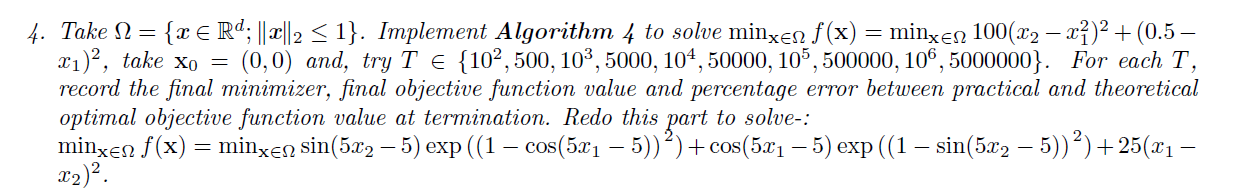

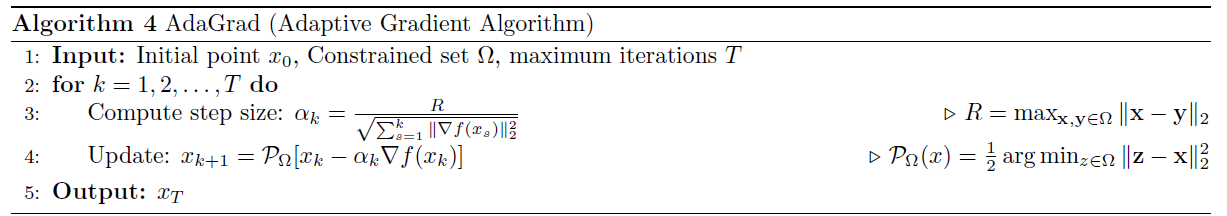

In [35]:
import numpy as np

def fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return 100*(x2 -x1**2)**2 + (0.5-x1)**2

def gradient_fx(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([-400*x1*(x2-x1**2)-2*(0.5-x1), 200*(x2-x1**2) ])

def projection(x0):
  if norm(x0) <= 1:
    return x0
  else:
    return x0/norm(x0)

def ada_grad(x0,  max_iter, R):
    xt= np.copy(x0)
    xks = []
    xks.append(x0)
    dividing_factor = norm(gradient_fx(xt))**2
    for _ in range(max_iter):
        alpha = R/np.sqrt(dividing_factor)
        yt = xt - alpha*gradient_fx(xt)
        # print("yt is: ", yt)
        xt = projection(yt)
        dividing_factor += norm(gradient_fx(xt))**2
        # print("xt is: ", xt)
        xks.append(xt)
    return xt, fx(xt), xks

# Example usage
x0 = np.array([0., 0.])
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
print("Max_Iter |   minimizer |    minimum  ")
minimizerstore = []
print('------------------------------------------------------')
for t in T:
  R = 2 # for this question
  minimizer, minimum, xks= ada_grad(x0, t, R)
  minimizerstore.append(minimizer)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [-0.1191874   0.01564742]   | 0.383600910872348 
------------------------------------------------------
500  |  [0.43711819 0.19075968]   | 0.003963895592601297 
------------------------------------------------------
1000  |  [0.49185363 0.24187917]   | 6.652998985998079e-05 
------------------------------------------------------
5000  |  [0.5  0.25]   | 2.207963373434313e-18 
------------------------------------------------------
10000  |  [0.5  0.25]   | 1.262177448353619e-29 
------------------------------------------------------
50000  |  [0.5  0.25]   | 1.262177448353619e-29 
------------------------------------------------------
100000  |  [0.5  0.25]   | 1.262177448353619e-29 
------------------------------------------------------
500000  |  [0.5  0.25]   | 1.262177448353619e-29 
------------------------------------------------------
1000000  |  [0.5  0.25]   | 1.262177448353619e

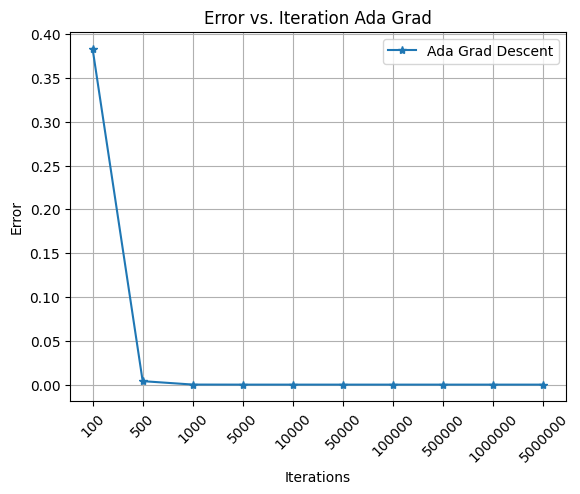

In [36]:
# Calculate the error for each iteration
#percentage error doesnt make sense here

ada_error = [np.abs(fx(x)) for x in minimizerstore]
# print(proximal_error)
# Plot log error vs. iterations
plt.plot(ada_error, label="Ada Grad Descent", marker='*')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.xticks(ticks = [i for i in range(len(ada_error))] ,labels = [str(x) for x in T], rotation =45 )
plt.title("Error vs. Iteration Ada Grad")
plt.legend()
plt.grid(True)
plt.show()

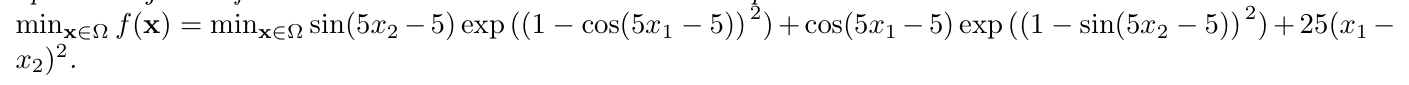

In [37]:
import numpy as np

def fx(xk):
  x = xk[0]
  y = xk[1]
  t = 5*x - 5
  m = 5*y - 5
  return sin(m)*exp( (1-cos(t))**2 ) + cos(t)*exp( (1-sin(m))**2 ) + (t-m)**2

def gradient_fx(xk):
  x = xk[0]
  y = xk[1]
  t = 5*x - 5
  m = 5*y - 5
  return np.array( [sin(m)*exp( (1-cos(t))**2 )*10*sin(t)*(1-cos(t)) - 5*exp((1-sin(m))**2)*sin(t) + 10*(t-m) ,
                    cos(m)*exp( (1-cos(t))**2 )*5 - 10*cos(t)*cos(m)*(1-sin(m))*exp((1-sin(m))**2) - 10*(t-m)] )

def projection(x0):
  if norm(x0) <= 1:
    return x0
  else:
    return x0/norm(x0)

def ada_grad(x0,  max_iter, R):
    xt= np.copy(x0)
    xks = []
    xks.append(x0)
    dividing_factor = norm(gradient_fx(xt))**2
    for _ in range(max_iter):
        alpha = R/np.sqrt(dividing_factor)
        yt = xt - alpha*gradient_fx(xt)
        # print("yt is: ", yt)
        xt = projection(yt)
        dividing_factor += norm(gradient_fx(xt))**2
        # print("xt is: ", xt)
        xks.append(xt)
    return xt, fx(xt), xks

# Example usage
x0 = np.array([0., 0.])
T = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
print("Max_Iter |   minimizer |    minimum  ")
print('------------------------------------------------------')
minimizerstore= []
for t in T:
  R = 2 # for this question
  minimizer, minimum, xks= ada_grad(x0, t, R)
  minimizerstore.append(minimizer)
  print(f'{t}  |  {minimizer}   | {minimum} ')
  print("------------------------------------------------------")

Max_Iter |   minimizer |    minimum  
------------------------------------------------------
100  |  [-0.89293896 -0.45017776]   | -67.7120096660121 
------------------------------------------------------
500  |  [-0.8381429  -0.54545071]   | -97.89422078414144 
------------------------------------------------------
1000  |  [-0.8381429  -0.54545071]   | -97.89422078414145 
------------------------------------------------------
5000  |  [-0.8381429  -0.54545071]   | -97.89422078414145 
------------------------------------------------------
10000  |  [-0.8381429  -0.54545071]   | -97.8942207841415 
------------------------------------------------------
50000  |  [-0.8381429  -0.54545071]   | -97.89422078414145 
------------------------------------------------------
100000  |  [-0.8381429  -0.54545071]   | -97.8942207841415 
------------------------------------------------------
500000  |  [-0.8381429  -0.54545071]   | -97.8942207841415 
--------------------------------------------------

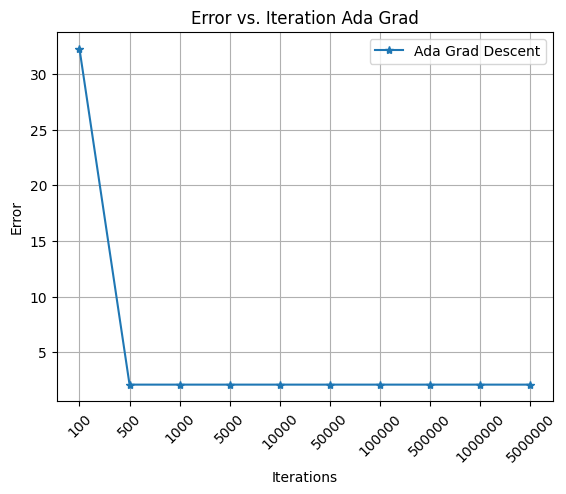

In [40]:
# Calculate the error for each iteration
#percentage error doesnt make sense here

ada_error = [np.abs(fx(x) -(-100)) for x in minimizerstore]
# print(proximal_error)
# Plot log error vs. iterations
plt.plot(ada_error, label="Ada Grad Descent", marker='*')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.xticks(ticks = [i for i in range(len(ada_error))] ,labels = [str(x) for x in T], rotation =45 )
plt.title("Error vs. Iteration Ada Grad")
plt.legend()
plt.grid(True)
plt.show()

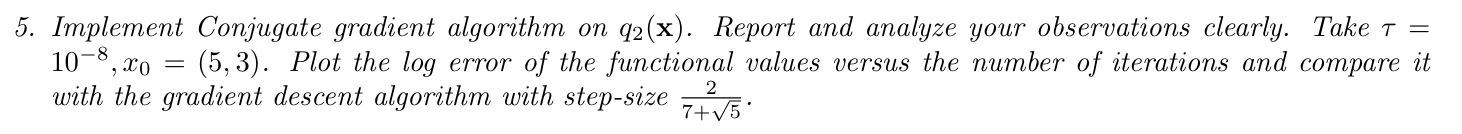

In [46]:
#q5

def q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return 0.5*x@A@x - b2@x

def grad_q2(x):
  A = np.array([[4,1],[1,3]])
  b2 = np.array([1,2])
  return A@x - b2

def hessian_q2():
  return np.array([[4,1],[1,3]])

def conjugate_gradient(x0, tau):
  rk = -1*grad_q2(x0)
  dk = np.copy(rk)
  xk = np.copy(x0)
  count = 0
  xks = []
  xks.append(x0)
  while norm(rk) > tau:
    alpha = (np.dot(rk, rk))/(dk@hessian_q2()@dk)
    xk = xk + alpha*dk
    prevrk = np.copy(rk)
    rk = rk - alpha*(hessian_q2()@dk)
    beta = -(rk@rk)/(prevrk@prevrk)
    dk = rk - beta*dk
    count +=1
    xks.append(xk)
  return count, xk, q2(xk), xks

def gradient_descent(alpha,tolerance):
  x = np.copy(x0)
  count = 0
  xks = []
  xks.append(x)
  while norm(grad_q2(x)) > tolerance:
    x = x - alpha*grad_q2(x)
    count +=1
    xks.append(x)
    # print(x)
  return count, x, q2(x), xks

# Example usage
x0 = np.array([5.,3.])
tau = 1e-8
alpha  = 2/(7+np.sqrt(5))

count, minimizer, minimum, xks_cg = conjugate_gradient(x0,tau)
print("minimizer |    minimum | iterations  | type")
print('------------------------------------------------------')
print(f'{minimizer}   | {minimum}   | {count}  | Conjugate Gradient')
print("------------------------------------------------------")
count, minimizer, minimum, xks_gd = gradient_descent(alpha,tau)
print(f'{minimizer}   | {minimum}   | {count}  | Gradient Descent Normal')
print("------------------------------------------------------")

minimizer |    minimum | iterations  | type
------------------------------------------------------
[0.09090909 0.63636364]   | -0.6818181818181819   | 2  | Conjugate Gradient
------------------------------------------------------
[0.09090909 0.63636363]   | -0.6818181818181818   | 26  | Gradient Descent Normal
------------------------------------------------------


Conjugate ran for 2 iteration only which the size of dimension of vector, which shows that for quadratic functions conjugate will take the iteration the size of dimension. Gradient descent again ran longer than conjugate

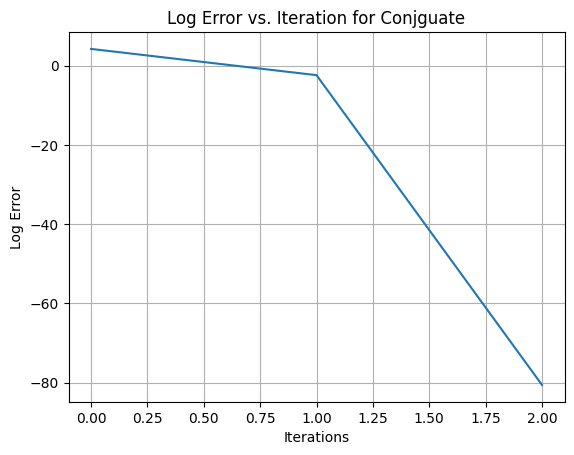

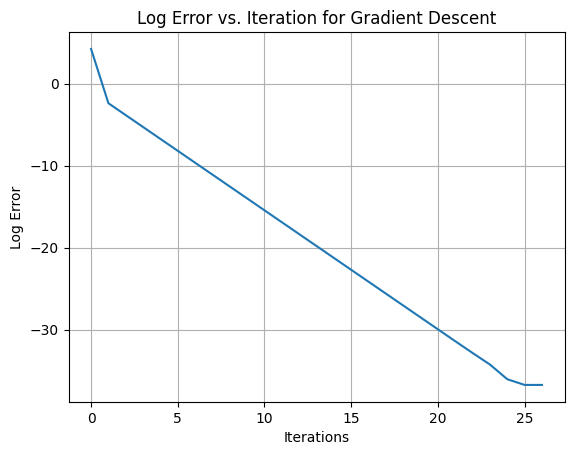

In [47]:
#log error for both
t = 0.001
W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
b1 = np.array([1,0])
A = np.array([[4,1],[1,3]])
b2 = np.array([1,2])
log_error_nagd = [np.abs(q2(x) - q2(np.array([0.09090909, 0.63636364]))) for x in xks_cg]
log_error_gd = [np.abs(q2(x) - q2(np.array([0.09090909, 0.63636364]))) for x in xks_gd]
log_error_nagd[2] = 1e-35
plt.plot(np.log(log_error_nagd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Conjguate")
plt.grid(True)
plt.show()

plt.plot(np.log(log_error_gd))
plt.xlabel("Iterations")
plt.ylabel("Log Error")
plt.title("Log Error vs. Iteration for Gradient Descent")
plt.grid(True)
plt.show()

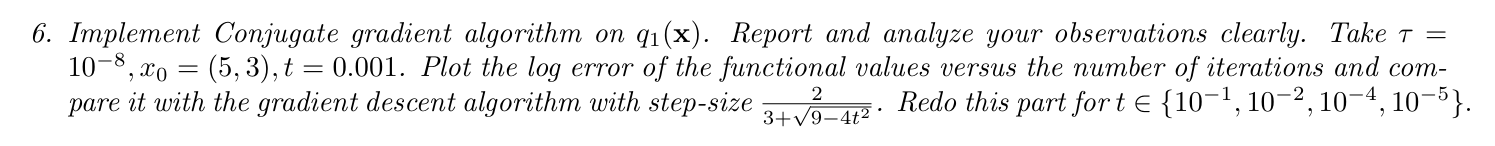

In [ ]:
#q5

def q1(x,W,b1):
  return 0.5*x@W@x - b1@x

def grad_q1(x, W, b1):
  return W@x - b1

def hessian_q1(t):
  return np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])


def conjugate_gradient(x0, tau, t):
  W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
  b1 = np.array([1,0])
  rk = -1*grad_q1(x0, W, b1)
  dk = np.copy(rk)
  xk = np.copy(x0)
  count = 0
  xks = []
  xks.append(x0)
  while norm(rk) > tau:
    alpha = (np.dot(rk, rk))/(dk@hessian_q1(t)@dk)
    xk = xk + alpha*dk
    prevrk = np.copy(rk)
    rk = rk - alpha*(hessian_q1(t)@dk)
    beta = -(rk@rk)/(prevrk@prevrk)
    dk = rk - beta*dk
    count +=1
    xks.append(xk)
  return count, xk, q1(xk, W, b1), xks

def gradient_descent(alpha,tolerance, t):
  x = np.copy(x0)
  count = 0
  xks = []
  xks.append(x)
  W = np.array([[t, np.sqrt(t)],[np.sqrt(t), t+1]])
  b1 = np.array([1,0])
  while norm(grad_q1(x, W, b1)) > tolerance:
    x = x - alpha*grad_q1(x, W, b1)
    count +=1
    xks.append(x)
    # print(x)
  return count, x, q1(x, W, b1), xks

x0 = np.array([5.,3.])
ts = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for t in ts:
  tau = 1e-8
  alpha  = 2/(3+ np.sqrt(9-4*t**2))
  count, minimizer, minimum, xkcg= conjugate_gradient(x0, tau, t)
  print("minimizer |    minimum | iterations  | type    |   t")
  print('------------------------------------------------------')
  print(f'{minimizer}   | {minimum}   | {count}  | Conjugate    | {t}')
  print("------------------------------------------------------")
  count, minimizer, minimum, xkgd = gradient_descent(alpha,tau, t)
  print(f'{minimizer}   | {minimum}   | {count}  | Gradient Descent Normal |   {t}')
  print("------------------------------------------------------")

minimizer |    minimum | iterations  | type    |   t
------------------------------------------------------
[110.        -31.6227766]   | -54.999999999999936   | 2  | Conjugate    | 0.1
------------------------------------------------------
[109.99999886 -31.62277627]   | -55.00000000000001   | 6542  | Gradient Descent Normal |   0.1
------------------------------------------------------
minimizer |    minimum | iterations  | type    |   t
------------------------------------------------------
[10100. -1000.]   | -5050.000000000045   | 2  | Conjugate    | 0.01
------------------------------------------------------
[10099.99989851  -999.99998995]   | -5050.000000000014   | 563440  | Gradient Descent Normal |   0.01
------------------------------------------------------
minimizer |    minimum | iterations  | type    |   t
------------------------------------------------------
[1000999.99999997  -31622.77660168]   | -500499.99999999657   | 2  | Conjugate    | 0.001
-----------------------

As we observe conjugate always takes 2 iterations, and gradient descent iteration keeps getting larger and larger. After 0.001 it was taking too much time so i stopped it.